# Gaussian Noise 

Add gaussian noise using numpy.random.normal
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html 

In [1]:
import pandas as pd

In [2]:
import numpy as np
from numpy.random import default_rng
rng = default_rng()

In [3]:
mu, sigma = 1, 0.1
s = np.random.normal(mu, sigma, 1000)

In [4]:
abs(mu - np.mean(s))

0.002469141001879893

In [5]:
abs(sigma - np.std(s, ddof=1))

0.001482102138922553

### Display the histogram of the samples, along with the probability density function:



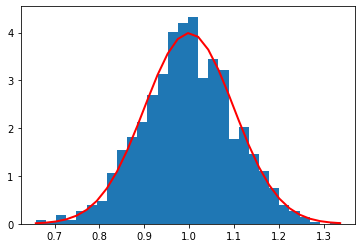

In [6]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

# S1 No Volatility

In [7]:
file_names = []

df = pd.read_csv ("../datasets/s1_no_vol.csv", nrows=10)
df.drop(columns=df.columns[:1],axis=1, inplace=True)

In [8]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 4)

Populating the interactive namespace from numpy and matplotlib


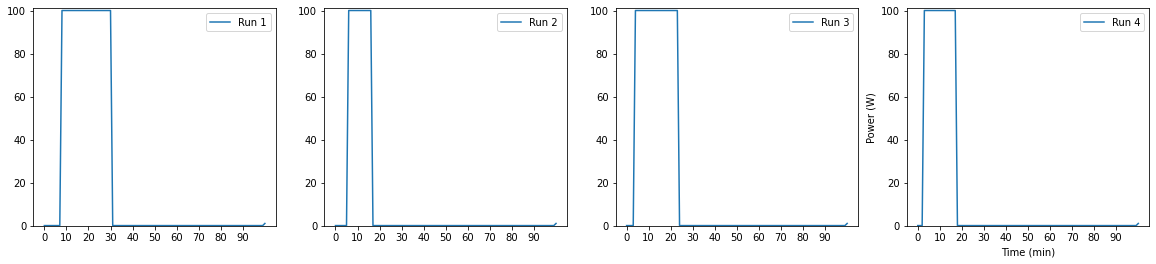

In [9]:
fig, axs = plt.subplots(1,4)

for i in range(4):
    axs[i].plot(df.columns,df.iloc[i,:], label = "Run "+str(i+1))

    axs[i].set_ylim([-0.1, 100+1])
    axs[i].set_xticks(np.arange(0, 100, 10))
    axs[i].legend()
    plt.xlabel("Time (min)")
    plt.ylabel("Power (W)")
    

# S1 With Noise

In [10]:
# make a copy of df
noise_df = df.copy()

In [11]:
num_cols = len(df.columns)

In [12]:
num_runs = len(df.index)

In [13]:
mu, sigma = 1, 0.1
max_noise = 10

In [14]:
for run in range(num_runs):
    noise = (rng.normal(mu, sigma, num_cols))
    # Noise has max value of 1, noise * max_noise results in max value
    # of max_noise
    noise = (noise * max_noise)
    noise_df.iloc[run] = noise_df.iloc[run] + noise

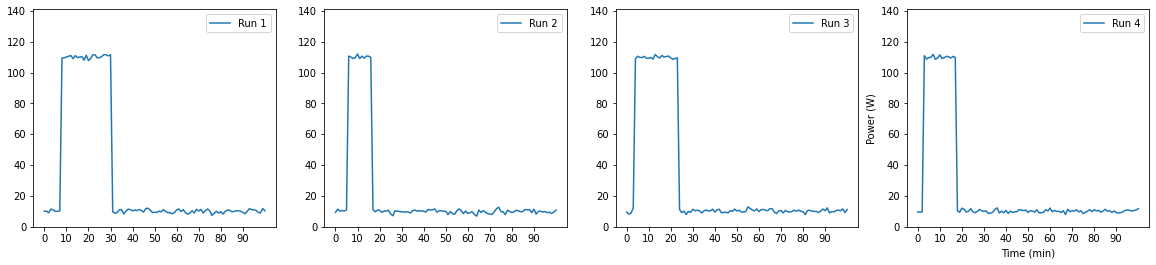

In [15]:
fig, axs = plt.subplots(1,4)

for i in range(4):
    axs[i].plot(noise_df.columns,noise_df.iloc[i,:], label = "Run "+str(i+1))

    axs[i].set_ylim([-0.1, 140+1])
    axs[i].set_xticks(np.arange(0, 100, 10))
    axs[i].legend()
    plt.xlabel("Time (min)")
    plt.ylabel("Power (W)")

# S1 With Volatility

In [16]:
# make a copy of df
vol_df = df.copy()

In [17]:
max_noise = 4

In [18]:
for run in range(num_runs):
    noise = (rng.normal(mu, sigma, num_cols))
        
    # Return random integers from low (inclusive) to high (exclusive).
    # Chooses values -1, 0 and 1     
    vals = np.random.randint(-1, 2, size=num_cols)
    
    # Noise has max value of 1, noise * max_noise results in max value
    # of max_noise
    noise = (noise * max_noise)*vals
    vol_df.iloc[run] = vol_df.iloc[run] + noise

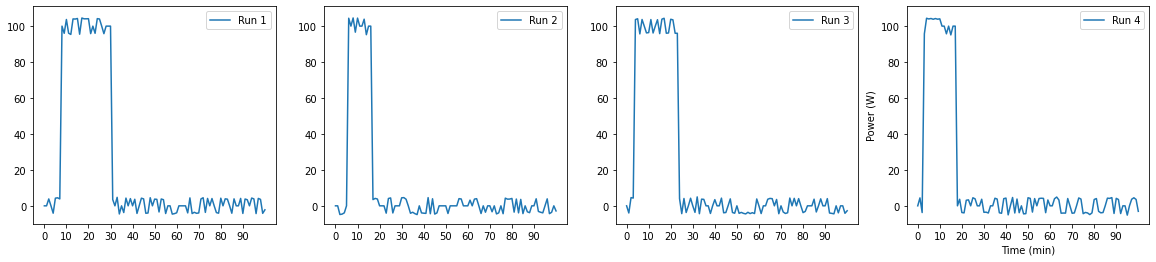

In [19]:
fig, axs = plt.subplots(1,4)

for i in range(4):
    axs[i].plot(vol_df.columns,vol_df.iloc[i,:], label = "Run "+str(i+1))

    axs[i].set_ylim([-10, 110+1])
    axs[i].set_xticks(np.arange(0, 100, 10))
    axs[i].legend()
    plt.xlabel("Time (min)")
    plt.ylabel("Power (W)")

# Clean the DF

If above 100, set to 100  
If below 0, set to 0  

In [20]:
vol_df[vol_df > 100] = 100
vol_df[vol_df < 0] = 0 

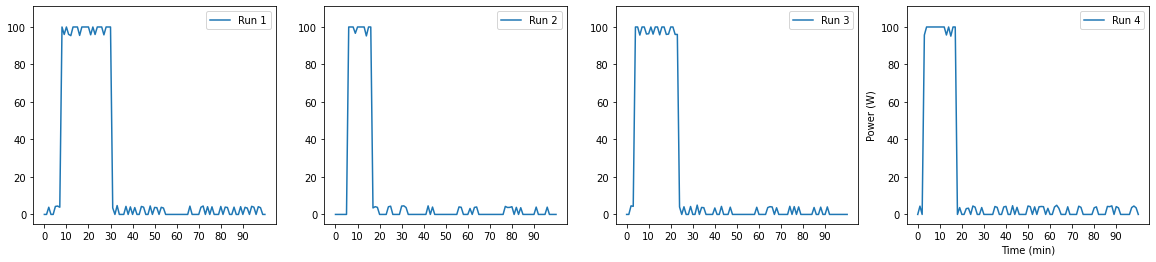

In [21]:
fig, axs = plt.subplots(1,4)

for i in range(4):
    axs[i].plot(vol_df.columns,vol_df.iloc[i,:], label = "Run "+str(i+1))

    axs[i].set_ylim([-5, 110+1])
    axs[i].set_xticks(np.arange(0, 100, 10))
    axs[i].legend()
    plt.xlabel("Time (min)")
    plt.ylabel("Power (W)")